In order to judge my model's performance, I want to have a baseline to compare it to. I'll build a simple routine for predicting player performance without ML. Later on, I'll use this baseline to see if my model can do any better than this non-ML solution.

In [22]:
import pandas as pd
import seaborn as sns
sns.set()

In [13]:
baseline_df = pd.read_pickle('/Users/andrewpeters/GitHub/fpl/data/interim/df_with_rolling_features.pkl')

In [14]:
baseline_df.head()

,total_points,player,team,position,gw,opponent_team,was_home,kickoff_time,season,total_points_prev,...,bonus_prev_9,bps_prev_9,influence_prev_9,creativity_prev_9,threat_prev_9,ict_index_prev_9,transfers_balance_prev_9,selected_prev_9,transfers_in_prev_9,transfers_out_prev_9
83979,1,Aaron_Connolly,Brighton and Hove Albion,4,4,Manchester City,False,2019-08-31T14:00:00Z,1920,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84511,1,Aaron_Connolly,Brighton and Hove Albion,4,5,Burnley,True,2019-09-14T14:00:00Z,1920,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85050,1,Aaron_Connolly,Brighton and Hove Albion,4,6,Newcastle United,False,2019-09-21T16:30:00Z,1920,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85591,1,Aaron_Connolly,Brighton and Hove Albion,4,7,Chelsea,False,2019-09-28T14:00:00Z,1920,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86137,13,Aaron_Connolly,Brighton and Hove Albion,4,8,Tottenham Hotspur,True,2019-10-05T11:30:00Z,1920,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
baseline_df['predicted_points'] = ((baseline_df['total_points_prev_9']*5) 
                          + (baseline_df['total_points_prev_5'])*3 
                          + (baseline_df['total_points_prev_3']*2))/10

In [16]:
baseline_df['residuals'] = baseline_df['total_points'] - baseline_df['predicted_points']

In [17]:
baseline_df = baseline_df.dropna()

<AxesSubplot:xlabel='total_points', ylabel='predicted_points'>

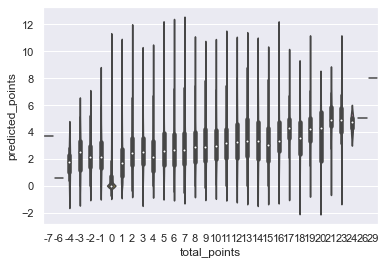

In [26]:
sns.violinplot(x='total_points', y='predicted_points', data=baseline_df)

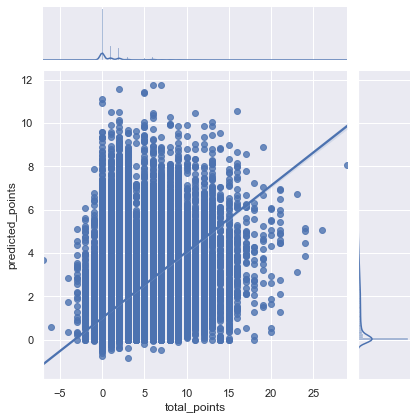

In [25]:
sns.jointplot(x='total_points', y='predicted_points', data=baseline_df, kind='reg')

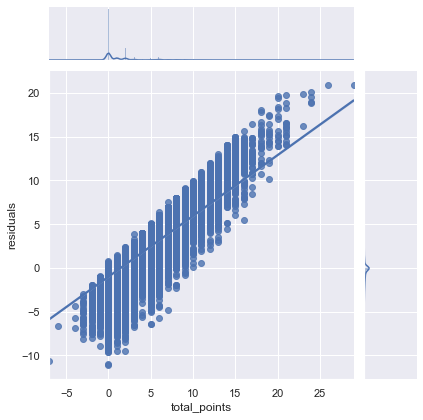

In [27]:
sns.jointplot(x ='total_points', y='residuals', data=baseline_df, kind='reg')